In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib import Path
import json
import math
import calendar
import seaborn as sns

from merge_files import StationData
import merge_files

%load_ext autoreload
%autoreload 2
%load_ext snakeviz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [207]:
df0 = pd.read_pickle(r'F:\cy\Database\ChinaStation\中国国家级地面气象站基本气象要素日值数据集（V3.0）SURF_CLI_CHN_MUL_DAY_V3.0\datasets\3_result_data\arid_spring_maize_etc.pkl')
df0 = df0.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    day = lambda x: x['date'].dt.day
)
df0

,station,latitude,longitude,altitude,date,cdays,tp,RH,sunhour,Tmax,...,growth_day,growth_stage,pe,kc,etc,ir,idi,year,month,day
0,51053,47.88,86.20,500.0,1958-04-15,105,1.8,88,1.6,12.9,...,1,ini,0.0,0.192830,0.273364,0.273364,1.000000,1958,4,15
1,51053,47.88,86.20,500.0,1958-04-16,106,0.1,71,6.0,15.6,...,2,ini,0.0,0.192830,0.445954,0.445954,1.000000,1958,4,16
2,51053,47.88,86.20,500.0,1958-04-17,107,2.9,83,3.3,15.1,...,3,ini,0.0,0.192830,0.347729,0.347729,1.000000,1958,4,17
3,51053,47.88,86.20,500.0,1958-04-18,108,1.0,84,0.0,13.9,...,4,ini,0.0,0.192830,0.297552,0.297552,1.000000,1958,4,18
4,51053,47.88,86.20,500.0,1958-04-19,109,0.1,74,9.7,13.3,...,5,ini,0.0,0.192830,0.461919,0.461919,1.000000,1958,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230532,57362,31.75,110.67,935.2,2014-08-28,240,18.7,92,0.0,19.7,...,136,late,0.9,0.670222,1.169758,0.269758,0.230610,2014,8,28
3230533,57362,31.75,110.67,935.2,2014-08-29,241,2.2,90,1.5,22.7,...,137,late,0.0,0.649079,1.342929,1.342929,1.000000,2014,8,29
3230534,57362,31.75,110.67,935.2,2014-08-30,242,0.0,87,2.1,24.5,...,138,late,0.0,0.627935,1.479004,1.479004,1.000000,2014,8,30
3230535,57362,31.75,110.67,935.2,2014-08-31,243,13.9,90,0.3,21.5,...,139,late,0.9,0.606792,1.224013,0.324013,0.264714,2014,8,31


In [214]:
df2 = df0.loc[df0.station==51053, :].groupby(by=['month', 'day'])['etc'].mean().reset_index()
df2['year'] = 2024
df2['date'] = pd.to_datetime(df2[['year', 'month', 'day']])
df2
# sns.relplot(x=df2['date'], y=df2['et0'], kind='line')

,month,day,etc,year,date
0,4,14,0.514425,2024,2024-04-14
1,4,15,0.493282,2024,2024-04-15
2,4,16,0.499576,2024,2024-04-16
3,4,17,0.550170,2024,2024-04-17
4,4,18,0.491546,2024,2024-04-18
...,...,...,...,...,...
136,8,28,3.506697,2024,2024-08-28
137,8,29,3.456998,2024,2024-08-29
138,8,30,3.433784,2024,2024-08-30
139,8,31,3.257205,2024,2024-08-31


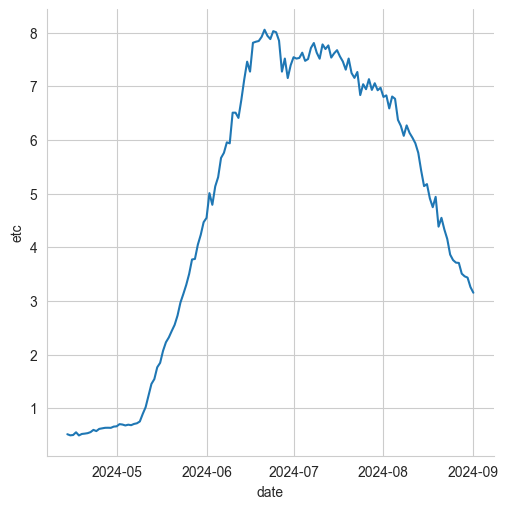

In [215]:
sns.relplot(x=df2.date, y=df2.etc, kind='line')

In [201]:
df0.station.unique()

array([50136, 50137, 50246, ..., 59954, 59981, 59985], dtype=int64)